
# Running circuits on quantum hardware: compiling circuits

---








In [1]:
from qiskit import IBMQ
provider = IBMQ.load_account()

The backends we have access to

In [2]:
[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

[('ibmq_qasm_simulator', 32),
 ('ibmq_lima', 5),
 ('ibmq_belem', 5),
 ('ibmq_quito', 5),
 ('simulator_statevector', 32),
 ('simulator_mps', 100),
 ('simulator_extended_stabilizer', 63),
 ('simulator_stabilizer', 5000),
 ('ibmq_manila', 5),
 ('ibm_nairobi', 7),
 ('ibm_oslo', 7)]

In [3]:
# If you have access to more than one hub:
#provider = IBMQ.get_provider("ibm-q-internal")                  
#[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

In [4]:
# from qiskit.tools.jupyter import *
# %qiskit_backend_overview
# print()

In [3]:
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(
                simulator=False,
                filters=lambda b: b.configuration().n_qubits >= 2))
print(backend)

ibm_nairobi


Let's go back to Bell state

In [4]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas_0: ══════════════╩══╬═
                         ║ 
meas_1: ═════════════════╩═

Remember how to run it in a simulator?

In [5]:
from qiskit import transpile

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐      ░ ┌─┐   
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───░─┤M├───
               └─────────┘└────┘└─────────┘┌─┴─┐ ░ └╥┘┌─┐
      q_1 -> 1 ────────────────────────────┤ X ├─░──╫─┤M├
                                           └───┘ ░  ║ └╥┘
ancilla_0 -> 2 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_1 -> 3 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_2 -> 4 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_3 -> 5 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_4 -> 6 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
       meas_0: ═════════════════════════════════════╩══╬═
                                                       ║ 
       meas_1: ════════════════════════════════════════╩═

In [6]:
job = backend.run(transpiled_circuit)

In [7]:
from time import sleep

while True:
    sleep(5)
    print(job.status())

JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEUED
JobStatus.QUEU

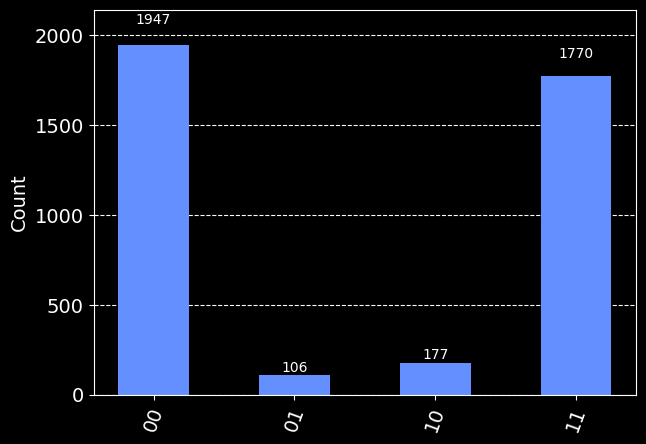

In [ ]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

global phase: π/4
         ┌─────────┐┌────┐┌─────────┐      ░ ┌─┐   
q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───░─┤M├───
         └─────────┘└────┘└─────────┘┌─┴─┐ ░ └╥┘┌─┐
q_1 -> 1 ────────────────────────────┤ X ├─░──╫─┤M├
                                     └───┘ ░  ║ └╥┘
 meas_0: ═════════════════════════════════════╩══╬═
                                                 ║ 
 meas_1: ════════════════════════════════════════╩═

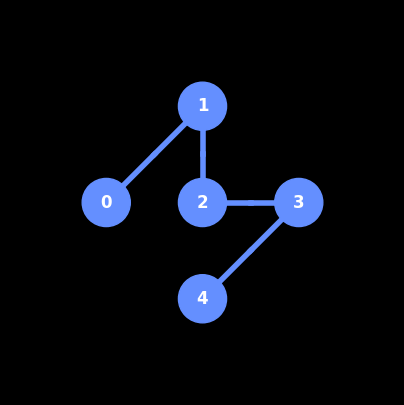

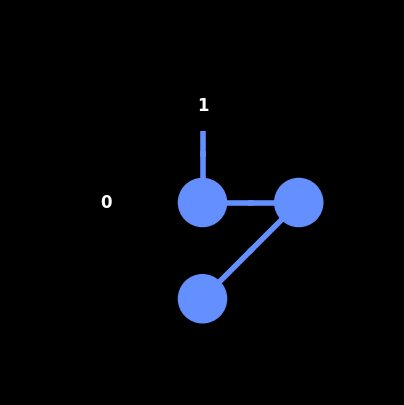

In [ ]:
from qiskit.visualization import plot_circuit_layout, plot_gate_map

display(transpiled_circuit.draw(idle_wires=False))
display(plot_gate_map(backend))
plot_circuit_layout(transpiled_circuit, backend)

In [ ]:
# a slightly more interesting example:
circuit = QuantumCircuit(3)
circuit.h([0,1,2])
circuit.ccx(0, 1, 2)
circuit.h([0,1,2])
circuit.ccx(2, 0, 1)
circuit.h([0,1,2])
circuit.measure_all()
circuit.draw()

┌───┐     ┌───┐     ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├──■──┤ H ├──■──┤ H ├─░─┤M├──────
        ├───┤  │  ├───┤┌─┴─┐├───┤ ░ └╥┘┌─┐   
   q_1: ┤ H ├──■──┤ H ├┤ X ├┤ H ├─░──╫─┤M├───
        ├───┤┌─┴─┐├───┤└─┬─┘├───┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤ X ├┤ H ├──■──┤ H ├─░──╫──╫─┤M├
        └───┘└───┘└───┘     └───┘ ░  ║  ║ └╥┘
meas_0: ═════════════════════════════╩══╬══╬═
                                        ║  ║ 
meas_1: ════════════════════════════════╩══╬═
                                           ║ 
meas_2: ═══════════════════════════════════╩═

In [ ]:
transpiled = transpile(circuit, backend)
transpiled.draw(fold=-1)

global phase: 3π/2
                                                                                                                                                                                                                                                                                                                  ░          
ancilla_0 -> 0 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────────
                                                                                                                                                                                                                                                                                                                  ░          
ancilla_1 -> 1 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────────
               ┌─────────┐┌────┐┌─────────┐                                      ┌─────────┐                      ┌───┐                                                                                                                         ┌───┐     ┌───┐                                                   ░    ┌─┐   
      q_1 -> 2 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────────────────────────────────■──┤ Rz(π/4) ├───────────────────■──┤ X ├──■───────────────────────────────────────────────────────────────────────■────────────────────────────────■─────────────┤ X ├──■──┤ X ├───────────────────────────────────────────────────░────┤M├───
               └─────────┘└────┘└─────────┘┌─┴─┐┌──────────┐┌───┐┌─────────┐┌─┴─┐├─────────┴┐┌───┐┌─────────┐┌─┴─┐└─┬─┘┌─┴─┐┌───┐┌──────────┐┌───┐                            ┌───┐┌──────────┐┌─┴─┐┌─────────┐┌───┐┌──────────┐┌─┴─┐┌─────────┐└─┬─┘┌─┴─┐└─┬─┘     ┌─────────┐      ┌─────────┐┌────┐┌─────────┐ ░    └╥┘┌─┐
      q_2 -> 3 ────────────────────────────┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├──■──┤ X ├┤ X ├┤ Rz(-π/4) ├┤ X ├────────────────────────────┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├──■──┤ X ├──■────■──┤ Rz(π/4) ├───■──┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─────╫─┤M├
               ┌─────────┐┌────┐┌─────────┐└───┘└──────────┘└─┬─┘└─────────┘└───┘└──────────┘└─┬─┘└─────────┘└───┘     └───┘└─┬─┘├─────────┬┘└─┬─┘┌─────────┐┌────┐┌─────────┐└─┬─┘└──────────┘└───┘└─────────┘└─┬─┘├─────────┬┘└───┘└─────────┘     └───┘     ┌─┴─┐├─────────┴┐┌─┴─┐├─────────┤├────┤├─────────┤ ░ ┌─┐ ║ └╥┘
      q_0 -> 4 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├───────────────────■────────────────────────────────■──────────────────────────────■──┤ Rz(π/4) ├───■──┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────────────────────────────────■──┤ Rz(π/4) ├────────────────────────────────┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤M├─╫──╫─
               └─────────┘└────┘└─────────┘                                                                                      └─────────┘      └─────────┘└────┘└─────────┘                                      └─────────┘                                └───┘└──────────┘└───┘└─────────┘└────┘└─────────┘ ░ └╥┘ ║  ║ 
       meas_0: ══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╬══╬═
                                                                                                                                                                     

Initial layout

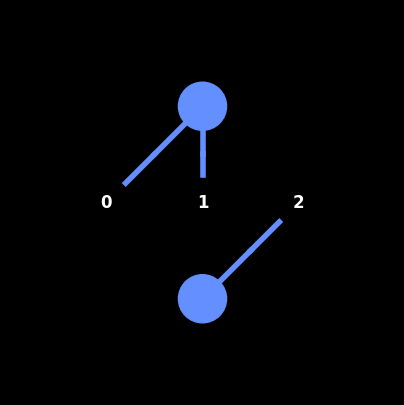

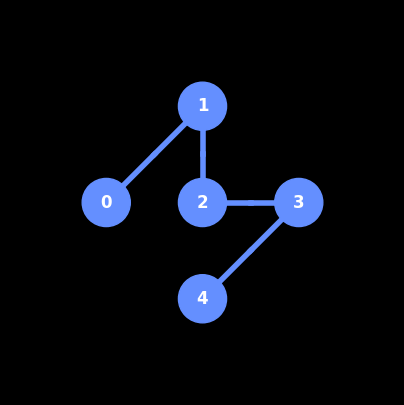

In [ ]:
transpiled = transpile(circuit, backend, initial_layout=[0, 2, 3])
display(plot_circuit_layout(transpiled, backend))
plot_gate_map(backend)

In [ ]:
transpiled.draw(fold=-1)

global phase: 3π/2
               ┌─────────┐┌────┐┌─────────┐        ┌───┐                                                                                                                                                                                                                                                                                                  ░          
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■─────┤ X ├──────■───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────────
               └─────────┘└────┘└─────────┘┌─┴─┐   └─┬─┘    ┌─┴─┐     ┌───┐             ┌───┐        ┌───┐                      ┌───┐             ┌───┐   ┌──────────┐┌───┐                            ┌───┐┌──────────┐          ┌───┐┌─────────┐          ┌───┐┌──────────┐               ┌───┐┌─────────┐                                              ░    ┌─┐   
ancilla_0 -> 1 ────────────────────────────┤ X ├─────■──────┤ X ├──■──┤ X ├──■──────────┤ X ├─────■──┤ X ├───────────────────■──┤ X ├──■──────────┤ X ├───┤ Rz(-π/4) ├┤ X ├────────────────────────────┤ X ├┤ Rz(-π/4) ├──────────┤ X ├┤ Rz(π/4) ├──────────┤ X ├┤ Rz(-π/4) ├───────────────┤ X ├┤ Rz(π/4) ├──────────────────────────────────────────────░────┤M├───
               ┌─────────┐┌────┐┌─────────┐└───┘            └───┘┌─┴─┐└─┬─┘┌─┴─┐        └─┬─┘   ┌─┴─┐└─┬─┘     ┌─────────┐ ┌─┴─┐└─┬─┘┌─┴─┐        └─┬─┘   ├─────────┬┘└─┬─┘┌─────────┐┌────┐┌─────────┐└─┬─┘└──────────┘┌───┐     └─┬─┘└──┬───┬──┘     ┌───┐└─┬─┘├─────────┬┘     ┌───┐     └─┬─┘└─────────┘┌─────────┐      ┌─────────┐┌────┐┌─────────┐ ░    └╥┘┌─┐
      q_1 -> 2 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───────────────────┤ X ├──■──┤ X ├──■───────■─────┤ X ├──■────■──┤ Rz(π/4) ├─┤ X ├──■──┤ X ├──■───────■─────┤ Rz(π/4) ├───■──┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───────■──────┤ X ├──■────■─────┤ X ├─────■──┤ X ├──■──┤ Rz(π/4) ├───■──┤ X ├──■────■───────■─────┤ Rz(π/4) ├───■──┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─────╫─┤M├
               └─────────┘└────┘└─────────┘┌─┴─┐┌──────────┐     └───┘     └───┘┌─┴─┐┌─────────┐└───┘     ┌─┴─┐├─────────┴┐└───┘     └───┘┌─┴─┐┌─────────┐└─────────┘      └─────────┘└────┘└─────────┘        ┌─┴─┐    └─┬─┘┌─┴─┐        └─┬─┘   ┌─┴─┐└─┬─┘     └─────────┘ ┌─┴─┐└─┬─┘┌─┴─┐        ┌─┴─┐   ├─────────┴┐┌─┴─┐├─────────┤├────┤├─────────┤ ░ ┌─┐ ║ └╥┘
      q_2 -> 3 ────────────────────────────┤ X ├┤ Rz(-π/4) ├────────────────────┤ X ├┤ Rz(π/4) ├──────────┤ X ├┤ Rz(-π/4) ├───────────────┤ X ├┤ Rz(π/4) ├─────────────────────────────────────────────────────┤ X ├──────■──┤ X ├──────────■─────┤ X ├──■───────────────────┤ X ├──■──┤ X ├────────┤ X ├───┤ Rz(-π/4) ├┤ X ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤M├─╫──╫─
                                           └───┘└──────────┘                    └───┘└─────────┘          └───┘└──────────┘               └───┘└─────────┘                                                     └───┘         └───┘                └───┘                      └───┘     └───┘        └───┘   └──────────┘└───┘└─────────┘└────┘└─────────┘ ░ └╥┘ ║  ║ 
ancilla_1 -> 4 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──╫──╫──╫─
                                                                                                                                                                                                                                                                                                                                                          ░  ║  ║  ║ 
       meas_0: ════════════════════════════

### Optimization level

Higher levels generate more optimized circuits, at the expense of longer transpilation time.

 * 0: no explicit optimization other than mapping to backend
 * 1: light optimization by simple adjacent gate collapsing.(default)
 * 2: medium optimization by noise adaptive qubit mapping and gate cancellation using commutativity rules.
 * 3: heavy optimization by noise adaptive qubit mapping and gate cancellation using commutativity rules and unitary synthesis.

In [ ]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1,2)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw()

┌───┐                ░ ┌─┐      
   q_0: ┤ H ├──■─────────■───░─┤M├──────
        └───┘┌─┴─┐       │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■────┼───░──╫─┤M├───
             └───┘┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├┤ X ├─░──╫──╫─┤M├
                  └───┘└───┘ ░  ║  ║ └╥┘
meas_0: ════════════════════════╩══╬══╬═
                                   ║  ║ 
meas_1: ═══════════════════════════╩══╬═
                                      ║ 
meas_2: ══════════════════════════════╩═

In [ ]:
level0 = transpile(circuit, backend, optimization_level=0)
level1 = transpile(circuit, backend, optimization_level=1)
level2 = transpile(circuit, backend, optimization_level=2)
level3 = transpile(circuit, backend, optimization_level=3)

In [ ]:
for level in [level0, level1, level2, level3]:
    print(level.count_ops()['cx'], level.depth())

6 10
6 10
4 8
4 8


Transpiling is a stochastic process

In [ ]:
transpiled = transpile(circuit, backend, optimization_level=2, seed_transpiler=0)
transpiled.depth()

10

In [ ]:
transpiled = transpile(circuit, backend, optimization_level=2, seed_transpiler=1)
transpiled.depth()

8

Playing with other transpiler options (without a backend)

In [ ]:
transpiled = transpile(circuit)
transpiled.draw(fold=-1)

┌───┐                ░ ┌─┐      
   q_0: ┤ H ├──■─────────■───░─┤M├──────
        └───┘┌─┴─┐       │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■────┼───░──╫─┤M├───
             └───┘┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├┤ X ├─░──╫──╫─┤M├
                  └───┘└───┘ ░  ║  ║ └╥┘
meas_0: ════════════════════════╩══╬══╬═
                                   ║  ║ 
meas_1: ═══════════════════════════╩══╬═
                                      ║ 
meas_2: ══════════════════════════════╩═

Set a basis gates

In [ ]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

In [ ]:
transpiled = transpile(circuit, basis_gates=['x', 'cx', 'h', 'p'])
transpiled.draw(fold=-1)

┌───┐                ░ ┌─┐      
   q_0: ┤ H ├──■─────────■───░─┤M├──────
        └───┘┌─┴─┐       │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■────┼───░──╫─┤M├───
             └───┘┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├┤ X ├─░──╫──╫─┤M├
                  └───┘└───┘ ░  ║  ║ └╥┘
meas_0: ════════════════════════╩══╬══╬═
                                   ║  ║ 
meas_1: ═══════════════════════════╩══╬═
                                      ║ 
meas_2: ══════════════════════════════╩═

Set a coupling map

In [ ]:
backend.configuration().coupling_map

[[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]

In [ ]:
from qiskit.transpiler import CouplingMap

transpiled = transpile(circuit, coupling_map=CouplingMap([(0,1),(1,2)]))
transpiled.draw(fold=-1)

┌───┐                   ░ ┌─┐      
q_0 -> 0 ┤ H ├──■────────────■───░─┤M├──────
         └───┘┌─┴─┐        ┌─┴─┐ ░ └╥┘   ┌─┐
q_1 -> 1 ─────┤ X ├──■───X─┤ X ├─░──╫────┤M├
              └───┘┌─┴─┐ │ └───┘ ░  ║ ┌─┐└╥┘
q_2 -> 2 ──────────┤ X ├─X───────░──╫─┤M├─╫─
                   └───┘         ░  ║ └╥┘ ║ 
 meas_0: ═══════════════════════════╩══╬══╬═
                                       ║  ║ 
 meas_1: ══════════════════════════════╩══╬═
                                          ║ 
 meas_2: ═════════════════════════════════╩═

Set an initial layout in a coupling map

In [ ]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2])
transpiled.draw(fold=-1)

┌───┐          ┌───┐                        ░    ┌─┐   
q_1 -> 0 ┤ H ├───────■──┤ H ├─────■──────────────────░────┤M├───
         ├───┤┌───┐┌─┴─┐├───┤   ┌─┴─┐┌───┐     ┌───┐ ░    └╥┘┌─┐
q_0 -> 1 ┤ H ├┤ H ├┤ X ├┤ H ├─X─┤ X ├┤ H ├──■──┤ H ├─░─────╫─┤M├
         └───┘└───┘└───┘└───┘ │ ├───┤└───┘┌─┴─┐├───┤ ░ ┌─┐ ║ └╥┘
q_2 -> 2 ─────────────────────X─┤ H ├─────┤ X ├┤ H ├─░─┤M├─╫──╫─
                                └───┘     └───┘└───┘ ░ └╥┘ ║  ║ 
 meas_0: ═══════════════════════════════════════════════╩══╬══╬═
                                                           ║  ║ 
 meas_1: ══════════════════════════════════════════════════╩══╬═
                                                              ║ 
 meas_2: ═════════════════════════════════════════════════════╩═

Set an initial_layout in the coupling map with basis gates

In [ ]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p']
                      )
transpiled.draw(fold=-1)

┌───┐          ┌───┐                                              ░    ┌─┐   
q_1 -> 0 ┤ H ├───────■──┤ H ├───────────────────────────■──────────────────░────┤M├───
         ├───┤┌───┐┌─┴─┐├───┤     ┌───┐     ┌───┐     ┌─┴─┐┌───┐     ┌───┐ ░    └╥┘┌─┐
q_0 -> 1 ┤ H ├┤ H ├┤ X ├┤ H ├──■──┤ H ├──■──┤ H ├──■──┤ X ├┤ H ├──■──┤ H ├─░─────╫─┤M├
         └───┘└───┘└───┘└───┘┌─┴─┐├───┤┌─┴─┐├───┤┌─┴─┐├───┤└───┘┌─┴─┐├───┤ ░ ┌─┐ ║ └╥┘
q_2 -> 2 ────────────────────┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─────┤ X ├┤ H ├─░─┤M├─╫──╫─
                             └───┘└───┘└───┘└───┘└───┘└───┘     └───┘└───┘ ░ └╥┘ ║  ║ 
 meas_0: ═════════════════════════════════════════════════════════════════════╩══╬══╬═
                                                                                 ║  ║ 
 meas_1: ════════════════════════════════════════════════════════════════════════╩══╬═
                                                                                    ║ 
 meas_2: ═══════════════════════════════════════════════════════════════════════════╩═

In [ ]:
transpiled.count_ops()['cx']

6

Plus optimization level

In [ ]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p'],
                       optimization_level=3
                      )
transpiled.draw(fold=-1)

┌───┐     ┌───┐                                              ░    ┌─┐   
q_1 -> 0 ┤ H ├──■──┤ H ├───────────────────────────■──────────────────░────┤M├───
         └───┘┌─┴─┐├───┤     ┌───┐     ┌───┐     ┌─┴─┐┌───┐     ┌───┐ ░    └╥┘┌─┐
q_0 -> 1 ─────┤ X ├┤ H ├──■──┤ H ├──■──┤ H ├──■──┤ X ├┤ H ├──■──┤ H ├─░─────╫─┤M├
              └───┘└───┘┌─┴─┐├───┤┌─┴─┐├───┤┌─┴─┐├───┤└───┘┌─┴─┐├───┤ ░ ┌─┐ ║ └╥┘
q_2 -> 2 ───────────────┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─────┤ X ├┤ H ├─░─┤M├─╫──╫─
                        └───┘└───┘└───┘└───┘└───┘└───┘     └───┘└───┘ ░ └╥┘ ║  ║ 
 meas_0: ════════════════════════════════════════════════════════════════╩══╬══╬═
                                                                            ║  ║ 
 meas_1: ═══════════════════════════════════════════════════════════════════╩══╬═
                                                                               ║ 
 meas_2: ══════════════════════════════════════════════════════════════════════╩═

In [ ]:
transpiled.count_ops()['cx']

6

Last parameter, approximation degree

In [ ]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p'],
                       approximation_degree=0.99,
                       optimization_level=3
                      )
transpiled.draw(fold=-1)

┌───┐     ┌───┐                                              ░    ┌─┐   
q_1 -> 0 ┤ H ├──■──┤ H ├───────────────────────────■──────────────────░────┤M├───
         └───┘┌─┴─┐├───┤     ┌───┐     ┌───┐     ┌─┴─┐┌───┐     ┌───┐ ░    └╥┘┌─┐
q_0 -> 1 ─────┤ X ├┤ H ├──■──┤ H ├──■──┤ H ├──■──┤ X ├┤ H ├──■──┤ H ├─░─────╫─┤M├
              └───┘└───┘┌─┴─┐├───┤┌─┴─┐├───┤┌─┴─┐├───┤└───┘┌─┴─┐├───┤ ░ ┌─┐ ║ └╥┘
q_2 -> 2 ───────────────┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─────┤ X ├┤ H ├─░─┤M├─╫──╫─
                        └───┘└───┘└───┘└───┘└───┘└───┘     └───┘└───┘ ░ └╥┘ ║  ║ 
 meas_0: ════════════════════════════════════════════════════════════════╩══╬══╬═
                                                                            ║  ║ 
 meas_1: ═══════════════════════════════════════════════════════════════════╩══╬═
                                                                               ║ 
 meas_2: ══════════════════════════════════════════════════════════════════════╩═

In [ ]:
transpiled.depth()

13

In [ ]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p'],
                       approximation_degree=0.01,
                       optimization_level=3
                      )
transpiled.draw(fold=-1)

┌───┐     ┌───┐                                              ░    ┌─┐   
q_1 -> 0 ┤ H ├──■──┤ H ├───────────────────────────■──────────────────░────┤M├───
         └───┘┌─┴─┐├───┤     ┌───┐     ┌───┐     ┌─┴─┐┌───┐     ┌───┐ ░    └╥┘┌─┐
q_0 -> 1 ─────┤ X ├┤ H ├──■──┤ H ├──■──┤ H ├──■──┤ X ├┤ H ├──■──┤ H ├─░─────╫─┤M├
              └───┘└───┘┌─┴─┐├───┤┌─┴─┐├───┤┌─┴─┐├───┤└───┘┌─┴─┐├───┤ ░ ┌─┐ ║ └╥┘
q_2 -> 2 ───────────────┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─────┤ X ├┤ H ├─░─┤M├─╫──╫─
                        └───┘└───┘└───┘└───┘└───┘└───┘     └───┘└───┘ ░ └╥┘ ║  ║ 
 meas_0: ════════════════════════════════════════════════════════════════╩══╬══╬═
                                                                            ║  ║ 
 meas_1: ═══════════════════════════════════════════════════════════════════╩══╬═
                                                                               ║ 
 meas_2: ══════════════════════════════════════════════════════════════════════╩═

In [ ]:
transpiled.depth()

13